Map with lines and distance between the islands

In [1]:
import os
import re
import glob
import numpy as np
import filament
import GPX_functions
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from vincenty import vincenty
import cartopy
import cartopy.crs as ccrs
myproj = ccrs.PlateCarree()                         
from osgeo import gdal, osr
import logging
from importlib import reload
reload(filament)

<module 'filament' from '/home/ctroupin/Projects/Perso/trail-running-maps/python/filament.py'>

In [2]:
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [38]:
visfile1 = "/data/Visible/Canarias/AQUA-2021-01-29T00_00_00Z.tiff"
os.path.isfile(visfile1)
vis = filament.Visible()
vis.read_geotiff(visfile1)
col1 = "#4277BD"
col2 = "#448E4A"
col3 = "#FD8E15"

In [49]:
summits = [
    [28.27276, -16.64236, "Teide\n(3718 m)"],
    [27.96085, -15.57120, "Morrón de la\nAgujereada\n(1956 m)"],
    [28.75448, -17.88511, "Roque de los\nMuchachos\n(2426 m)"],
    [27.72919, -18.04044, "Malpaso\n(1501 m)"],
    [28.10975, -17.24834, "Alto de\nGarajonay\n(1483 m)"],
    [28.10182, -14.35552, "Pico de la\nZarza\n(807 m)"],
    [29.11927, -13.52098, "Peñas del\nChache\n(674 m)"],
]

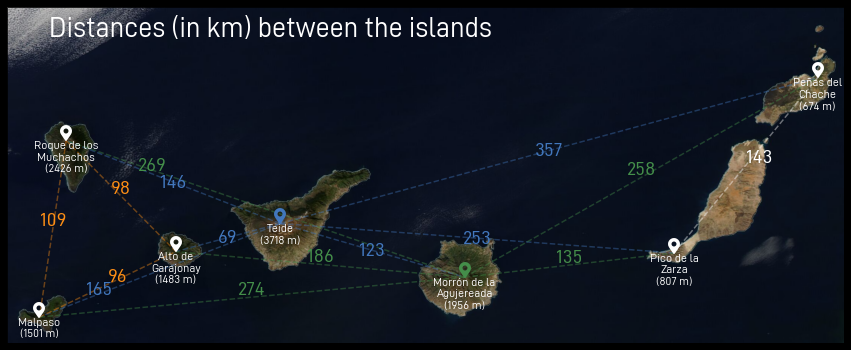

In [50]:
fig = plt.figure(figsize=(15, 8))
fig.patch.set_facecolor('black')
ax = plt.subplot(111, projection=myproj)
vis.add_to_plot(ax, myproj)
#ax.set_xlim(-16.94, -16.1)

for ii, s in enumerate(summits):
    
    if ii == 0:
        ax.text(s[1], s[0], "\uf3c5", fontproperties=fp1,
        fontsize=16, ha="center", va="bottom", zorder=7, color=col1)
    elif ii == 1:
        ax.text(s[1], s[0], "\uf3c5", fontproperties=fp1,
        fontsize=16, ha="center", va="bottom", zorder=7, color=col2)
    else:
        ax.text(s[1], s[0], "\uf3c5", fontproperties=fp1,
        fontsize=16, ha="center", va="bottom", zorder=7, color="w")
        
    ax.text(s[1], s[0], s[2], fontproperties=myfont,
        fontsize=12, ha="center", va="top", zorder=7, color='w')
        
    
    if ii > 0:
        
        d = int(vincenty((summits[0][1], summits[0][0]), (s[1], s[0])))
        ax.plot([summits[0][1], s[1]], [summits[0][0], s[0]], "--", color=col1, alpha=.4)

        if ii == 3:
            ax.text(0.3 * summits[0][1] + 0.7 * s[1], 0.3 * summits[0][0] + 0.7 * s[0], "{}".format(d), 
                    color=col1, va="center", ha="right", fontsize=20, fontproperties=myfont)
        else:
            ax.text(0.5 * (summits[0][1] + s[1]), 0.5 * (summits[0][0] + s[0]), "{}".format(d), 
                    color=col1, va="center", ha="center", fontsize=20, fontproperties=myfont)
        
    if ii > 1:
        
        d = int(vincenty((summits[1][1], summits[1][0]), (s[1], s[0])))
        ax.plot([summits[1][1], s[1]], [summits[1][0], s[0]], "--", color=col2, alpha=.4)
        
        if ii == 2:
            ax.text(0.4 * summits[0][1] + 0.6 * s[1], 0.4 * summits[0][0] + 0.6 * s[0], "{}".format(d), 
                color=col2, va="bottom", ha="center", fontsize=20, fontproperties=myfont)
        else:
            ax.text(0.5 * (summits[1][1] + s[1]), 0.5 * (summits[1][0] + s[0]), "{}".format(d), 
                    color=col2, va="bottom", ha="center", fontsize=20, fontproperties=myfont)
        

d = int(vincenty((summits[2][1], summits[2][0]), (summits[3][1], summits[3][0])))
ax.text(0.5 * (summits[2][1] + summits[3][1]), 0.5 * (summits[2][0] + summits[3][0]), "{}".format(d), 
                    color=col3, va="bottom", ha="center", fontsize=20, fontproperties=myfont)
ax.plot([summits[2][1], summits[3][1]], [summits[2][0], summits[3][0]], "--", color=col3, alpha=.4)

d = int(vincenty((summits[2][1], summits[2][0]), (summits[4][1], summits[4][0])))
ax.text(0.5 * (summits[2][1] + summits[4][1]), 0.5 * (summits[2][0] + summits[4][0]), "{}".format(d), 
                    color=col3, va="bottom", ha="center", fontsize=20, fontproperties=myfont)
ax.plot([summits[2][1], summits[4][1]], [summits[2][0], summits[4][0]], "--", color=col3, alpha=.4)

d = int(vincenty((summits[3][1], summits[3][0]), (summits[4][1], summits[4][0])))
ax.text(0.5 * (summits[4][1] + summits[3][1]), 0.5 * (summits[4][0] + summits[3][0]), "{}".format(d), 
                    color=col3, va="bottom", ha="left", fontsize=20, fontproperties=myfont)
ax.plot([summits[3][1], summits[4][1]], [summits[3][0], summits[4][0]], "--", color=col3, alpha=.4)

d = int(vincenty((summits[5][1], summits[5][0]), (summits[6][1], summits[6][0])))
ax.text(0.5 * (summits[5][1] + summits[6][1]), 0.5 * (summits[5][0] + summits[6][0]), "{}".format(d), 
                    color="w", va="bottom", ha="left", fontsize=20, fontproperties=myfont)
ax.plot([summits[5][1], summits[6][1]], [summits[5][0], summits[6][0]], "--", color="w", alpha=.4)

        
t = plt.text(0.05, 0.97, 'Distances (in km) between the islands', fontproperties=myfont,
             horizontalalignment='left',
         verticalalignment='top',
         transform = ax.transAxes, color="w", fontsize=28)


plt.savefig("../images/canary_dist14.jpg", dpi=300, bbox_inches="tight")
plt.show()
plt.close()